In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

from datetime import date
from mpr.reports.cash_index import get_cash_prices

cash_prices = await get_cash_prices(date(2015, 1, 1))

In [2]:
# What were the average prices for the last 10 days?
cash_prices[['Daily Avg Price', 'Price Change', 'CME Index', 'Index Change']].tail(10)

,Daily Avg Price,Price Change,CME Index,Index Change
date,,,,
2019-02-20,53.93,-0.26,54.06,-0.07
2019-02-21,53.40,-0.53,53.65,-0.41
2019-02-22,52.92,-0.48,53.13,-0.52
2019-02-25,52.73,-0.19,52.85,-0.28
2019-02-26,52.88,0.15,52.82,-0.03
2019-02-27,52.39,-0.49,52.64,-0.18
2019-02-28,51.86,-0.53,52.13,-0.51
2019-03-01,51.98,0.12,51.93,-0.20
2019-03-04,51.87,-0.11,51.94,0.01


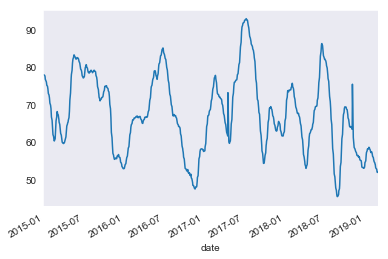

In [3]:
# Plot the CME Index on a chart
cash_prices.get('CME Index').plot()

In [4]:
# view the full report for the month of February
cash_prices.query("date >= '2019-02-01'")

,CME Index,Index Change,Daily Avg Price,Price Change,Negotiated Head Count,Negotiated Carcass Weight,Negotiated Net Price,Market Formula Head Count,Market Formula Carcass Weight,Market Formula Net Price
date,,,,,,,,,,
2019-02-01,57.41,0.23,57.45,0.12,12771,205.41,53.26,256439,216.06,57.65
2019-02-04,57.36,-0.05,57.18,-0.27,7196,210.47,51.39,136772,215.02,57.48
2019-02-05,57.16,-0.20,57.13,-0.05,6711,199.08,51.89,139497,212.83,57.37
2019-02-06,56.89,-0.27,56.65,-0.48,7472,203.65,51.90,140167,215.30,56.89
2019-02-07,56.53,-0.36,56.40,-0.25,7226,192.65,52.40,131114,214.80,56.60
2019-02-08,56.14,-0.39,55.98,-0.42,17320,205.41,52.54,209556,215.85,56.25
2019-02-11,55.91,-0.23,55.78,-0.20,8912,204.93,51.51,125080,214.30,56.07
2019-02-12,55.55,-0.36,55.32,-0.46,8003,203.02,50.77,128503,213.55,55.59
2019-02-13,55.24,-0.31,55.16,-0.16,5857,194.79,51.34,143189,215.33,55.30


In [53]:

from fbprophet import Prophet
import pandas as pd

df = cash_prices['Daily Avg Price'].to_frame().reset_index()
df.columns=['ds', 'y']

In [82]:
from fbprophet.plot import add_changepoints_to_plot
m = Prophet(weekly_seasonality=0)
m.fit(df)

future = m.make_future_dataframe(periods=365)
forecast=m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


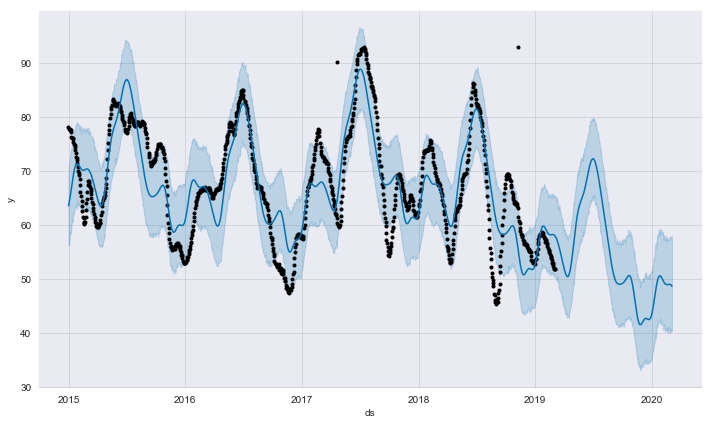

In [76]:
fig = m.plot(forecast)

In [117]:
predictions = forecast.set_index(forecast['ds']).loc['2019-4-1':'2019-8-1']
predictions[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2019-04-01,51.99,44.49,59.77
2019-04-02,51.75,44.08,58.59
2019-04-03,51.53,43.85,58.83
2019-04-04,51.32,43.98,58.74
2019-04-05,51.12,43.46,58.74
2019-04-06,50.95,43.55,58.21
2019-04-07,50.79,43.44,57.93
2019-04-08,50.65,42.76,57.55
2019-04-09,50.54,42.88,57.87


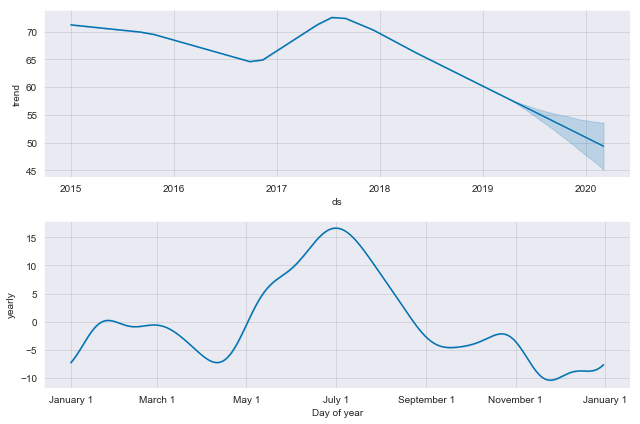

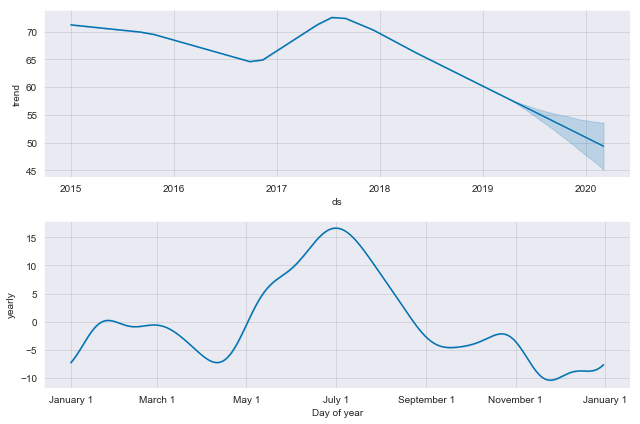

In [77]:
m.plot_components(forecast)

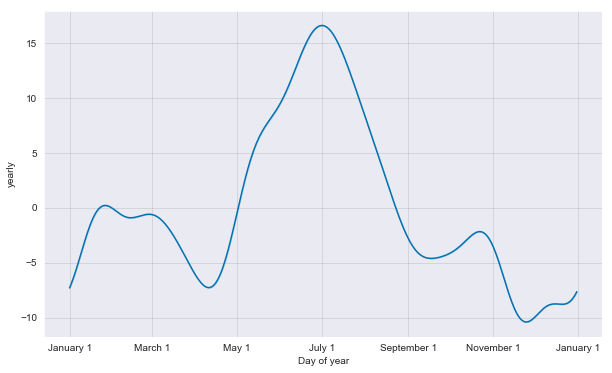

In [78]:
from fbprophet.plot import plot_yearly
plot_yearly(m)